In [21]:
!pip install yfinance

In [22]:
# Importando as bibliotecas

In [71]:
import yfinance as yf
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta

import seaborn as sns
plt.style.use('seaborn')

C:\Users\andra\AppData\Local\Temp\ipykernel_34820\2144221094.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [24]:
# Definindo os ativos JPMorgan, BofA e SP&500 e as datas

In [25]:
ativos = ['JPM', 'BAC', '^GSPC']

data = datetime.now()

cinco_anos_atras = data - timedelta(days = 360*5)

In [26]:
# Pegando os dados e criando o df

In [27]:
dados_cotacoes = yf.download(ativos, cinco_anos_atras, data)['Adj Close']

dados_cotacoes

[*********************100%***********************]  3 of 3 completed


,BAC,JPM,^GSPC
Date,,,
2018-05-15,27.912500,97.298706,2711.449951
2018-05-16,27.769451,97.565544,2722.459961
2018-05-17,27.545938,97.238434,2720.129883
2018-05-18,27.054213,95.663147,2712.969971
2018-05-21,27.313482,96.541206,2733.010010
...,...,...,...
2023-04-13,28.559999,128.990005,4146.220215
2023-04-14,29.520000,138.729996,4137.640137
2023-04-17,30.370001,139.830002,4151.319824


In [28]:
# Calculando os retornos diários dos ativos

In [29]:
retornos_diarios = dados_cotacoes.pct_change().dropna()

retornos_diarios

,BAC,JPM,^GSPC
Date,,,
2018-05-16,-0.005125,0.002742,0.004061
2018-05-17,-0.008049,-0.003353,-0.000856
2018-05-18,-0.017851,-0.016200,-0.002632
2018-05-21,0.009583,0.009179,0.007387
2018-05-22,0.011129,0.007668,-0.003136
...,...,...,...
2023-04-13,0.002809,0.003813,0.013263
2023-04-14,0.033613,0.075510,-0.002069
2023-04-17,0.028794,0.007929,0.003306


In [30]:
# Calculando o Beta de JPM

In [31]:
x = retornos_diarios['^GSPC']       #Pegando a coluna de retornos do IBOV (eixo x)
y_JPM = retornos_diarios[ativos[0]]     #Pegando a coluna de retornos do JPM (eixo y)

In [32]:
x = sm.add_constant(x)

model_JPM = sm.OLS(y_JPM, x).fit()       #Fazendo a regressão linear de y contra x (JPM contra IBOV)

model_JPM

In [33]:
beta_JPM = print(model_JPM.params[1])                   #Devolve o valor do Beta de JPM
beta_JPM

print(model_JPM.rsquared)                    #Devolve o nível do R-quadrado
print('-------------------------')    
print(str(model_JPM.summary()))              #Mostra os resultados da regressão linear via MQO


1.0947430306608879
0.5418910394396512
-------------------------
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          4.25e-212
Time:                        17:25:40   Log-Likelihood:                 3550.3
No. Observations:                1240   AIC:                            -7097.
Df Residuals:                    1238   BIC:                            -7086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [34]:
# Calculando o Beta de BAC

In [35]:
x = retornos_diarios['^GSPC']       #Pegando a coluna de retornos do IBOV (eixo x)
y_BAC = retornos_diarios[ativos[1]]     #Pegando a coluna de retornos do BAC (eixo y)

In [36]:
x = sm.add_constant(x)

model_BAC = sm.OLS(y_BAC, x).fit()       #Fazendo a regressão linear de y contra x (JPM contra IBOV)

model_BAC

In [37]:
beta_BAC = print(model_BAC.params[1])                   #Devolve o valor do Beta de JPM
beta_BAC

print(model_BAC.rsquared)                    #Devolve o nível do R-quadrado
print('-------------------------')    
print(str(model_BAC.summary()))              #Mostra os resultados da regressão linear via MQO

1.2078103090888268
0.5405677080754737
-------------------------
                            OLS Regression Results                            
Dep. Variable:                    BAC   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1457.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          2.53e-211
Time:                        17:25:40   Log-Likelihood:                 3425.2
No. Observations:                1240   AIC:                            -6846.
Df Residuals:                    1238   BIC:                            -6836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [38]:
# Plotando gráficos das regressões 

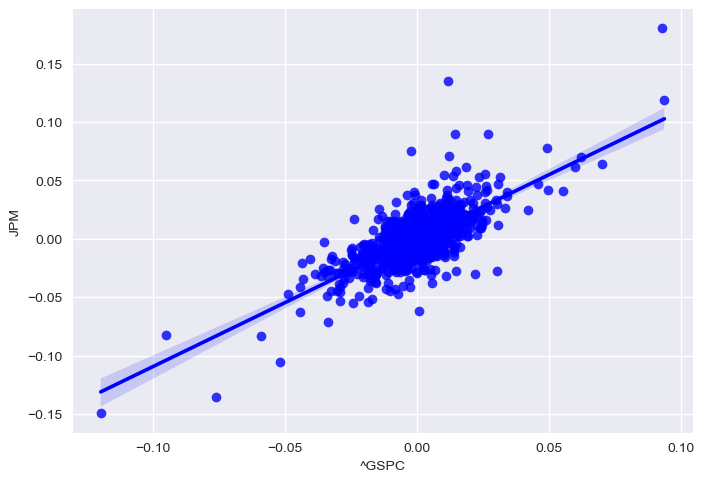

In [72]:
OLS_JPM = sns.regplot(data = retornos_diarios, x = '^GSPC', y = 'JPM', color = 'Blue')

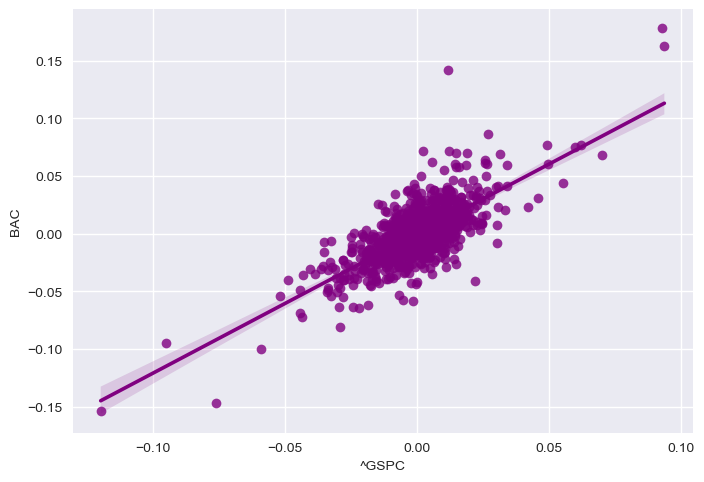

In [73]:
OLS_BAC = sns.regplot(data = retornos_diarios, x = '^GSPC', y = 'BAC', color = 'Purple')

In [41]:
# Importando bibliotecas para plotar gráficos dos ativos

In [42]:
!pip install seaborn
!pip install seaborn -U

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

import pandas as pd

In [44]:
# Plotando os gráficos dos retornos diários do JPM

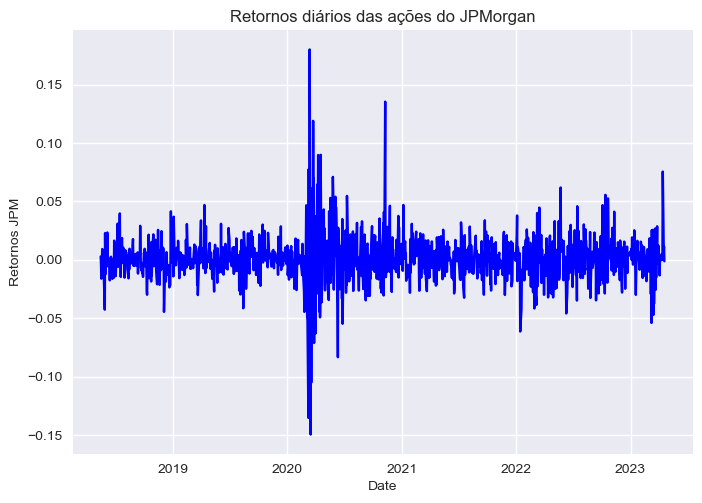

In [74]:
sns.lineplot(data = retornos_diarios, x = 'Date', y = 'JPM', color = 'Blue')

plt.title('Retornos diários das ações do JPMorgan')
plt.ylabel('Retornos JPM')
plt.show()

In [46]:
# Plotando os gráficos dos retornos diários do BAC

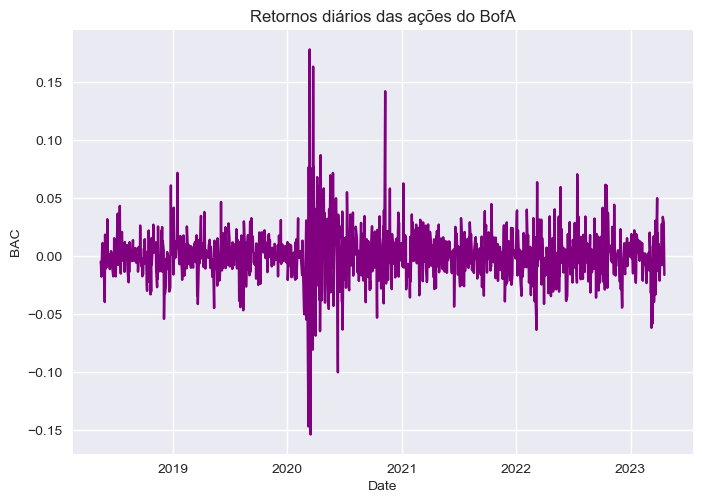

In [76]:
sns.lineplot(data = retornos_diarios, x = 'Date', y = 'BAC', color = 'Purple')

plt.title('Retornos diários das ações do BofA')
plt.show()

In [48]:
# Plotando os gráficos de preços do JPM (em dólares)

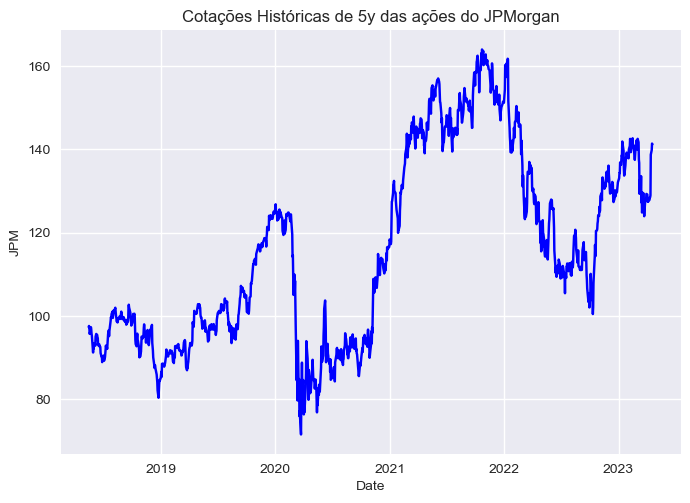

In [77]:
sns.lineplot(data = dados_cotacoes, x = 'Date', y = 'JPM', color = 'Blue')

plt.title('Cotações Históricas de 5y das ações do JPMorgan')
plt.show()

In [50]:
# Plotando os gráficos de preços do BAC (em dólares)

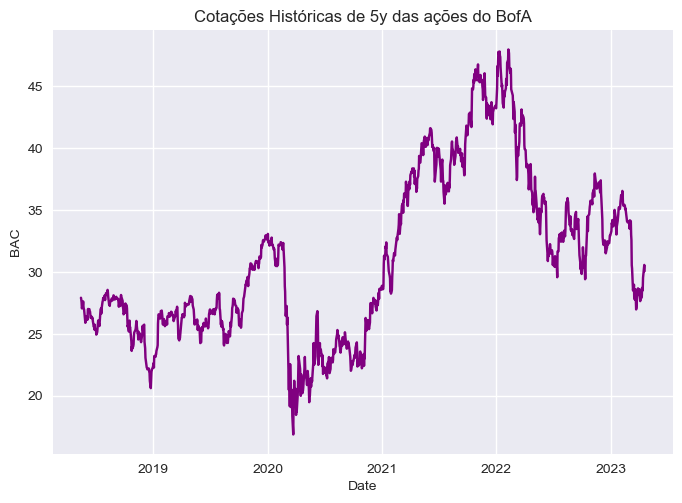

In [78]:
sns.lineplot(data = dados_cotacoes, x = 'Date', y = 'BAC', color = 'Purple')

plt.title('Cotações Históricas de 5y das ações do BofA')
plt.show()

In [52]:
# Plotando o gráfico de preços com sobreposição 

In [79]:
dados_bancos = dados_cotacoes.drop(columns = ['^GSPC'])       #Excluindo a coluna de S&P500 para plotar o gráfico dos ativos
  
dados_bancos

,BAC,JPM
Date,,
2018-05-15,27.912500,97.298706
2018-05-16,27.769451,97.565544
2018-05-17,27.545938,97.238434
2018-05-18,27.054213,95.663147
2018-05-21,27.313482,96.541206
...,...,...
2023-04-13,28.559999,128.990005
2023-04-14,29.520000,138.729996
2023-04-17,30.370001,139.830002


<Axes: title={'center': 'Preços históricos de JPM e BAC'}, xlabel='Date'>

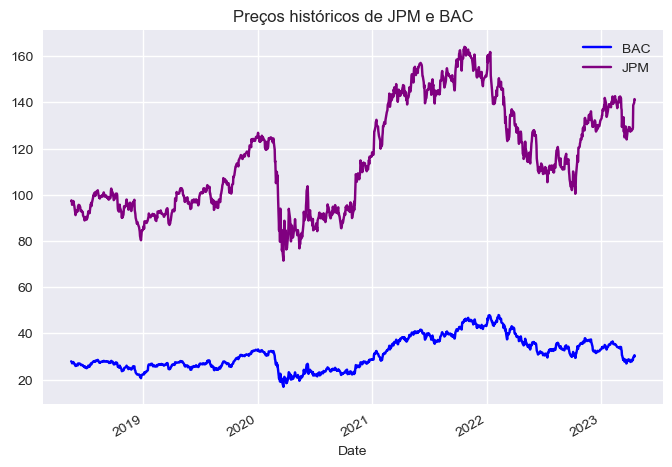

In [80]:
dados_bancos.dropna().plot(title = 'Preços históricos de JPM e BAC', color = ['Blue', 'Purple'])

In [85]:
dados_sp500 = dados_cotacoes.drop(columns = ['JPM', 'BAC'])       #Excluindo a coluna de S&P500 para plotar o gráfico dos ativos
  
dados_sp500

,^GSPC
Date,
2018-05-15,2711.449951
2018-05-16,2722.459961
2018-05-17,2720.129883
2018-05-18,2712.969971
2018-05-21,2733.010010
...,...
2023-04-13,4146.220215
2023-04-14,4137.640137
2023-04-17,4151.319824


<Axes: title={'center': 'Preços Históricos de S&P 500'}, xlabel='Date'>

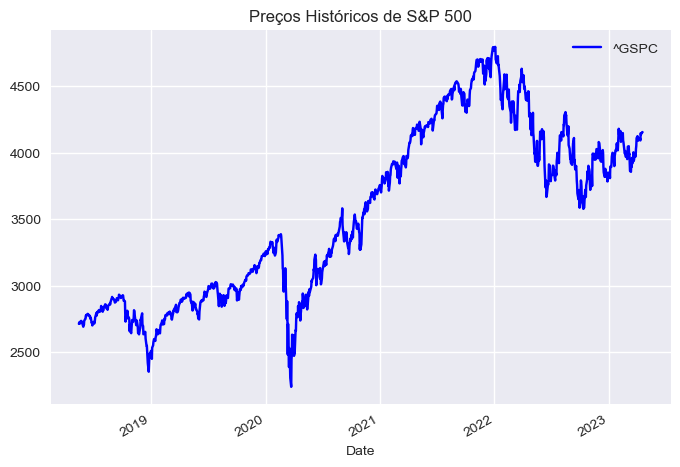

In [82]:
dados_sp500.dropna().plot(title = 'Preços Históricos de S&P 500', color = 'Blue')

In [57]:
# Calculando a correlação dos ativos

In [58]:
matrix_correlacao = retornos_diarios.corr()

matrix_correlacao

,BAC,JPM,^GSPC
BAC,1.000000,0.920416,0.735233
JPM,0.920416,1.000000,0.736132
^GSPC,0.735233,0.736132,1.000000


In [59]:
correlacao_BAC_JPM = matrix_correlacao.iloc[(1,0)]

correlacao_BAC_JPM

0.9204155591377662

In [60]:
correlacao_BAC_SP = matrix_correlacao.iloc[(2,0)]

correlacao_BAC_SP

0.735233097782924

In [61]:
correlacao_JPM_SP = matrix_correlacao.iloc[(2,1)]

correlacao_JPM_SP 

0.7361324876947442

In [62]:
# Calculando o retorno acumulado dos ativos

In [63]:
retornos_acum = pd.DataFrame()
for i in ativos:
    retornos_acum[i] = (retornos_diarios[i]+1).cumprod()-1             #'cumprod()' devolve o produto cumulativo
#retornos_acum['Date'] = retornos_diarios['Date']

retornos_acum

,JPM,BAC,^GSPC
Date,,,
2018-05-16,0.002742,-0.005125,0.004061
2018-05-17,-0.000619,-0.013133,0.003201
2018-05-18,-0.016810,-0.030749,0.000561
2018-05-21,-0.007785,-0.021461,0.007951
2018-05-22,-0.000177,-0.010570,0.004791
...,...,...,...
2023-04-13,0.325711,0.023197,0.529152
2023-04-14,0.425815,0.057591,0.525988
2023-04-17,0.437121,0.088043,0.531033


In [64]:
# Plotando o gráfico do retorno acumulado dos ativos

<Axes: title={'center': 'Retornos acumulados de JPM, BAC e S&P500'}, xlabel='Date'>

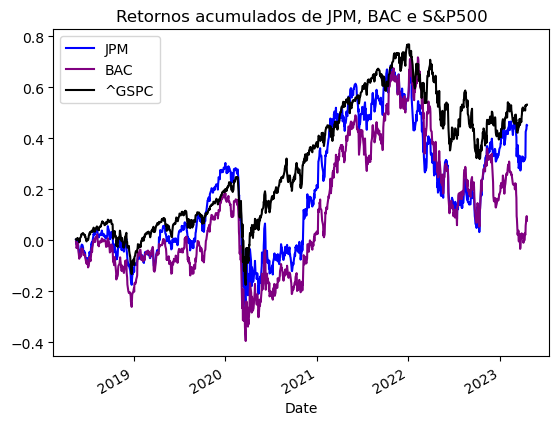

In [65]:
retornos_acum.dropna().plot(title = 'Retornos acumulados de JPM, BAC e S&P500', color = ['Blue', 'Purple', 'Black'])

In [66]:
# Plotando o gráfico sem a comparação do S&P 500

In [67]:
retornos_acum_bancos = retornos_acum.drop(columns = ['^GSPC'])

retornos_acum_bancos

,JPM,BAC
Date,,
2018-05-16,0.002742,-0.005125
2018-05-17,-0.000619,-0.013133
2018-05-18,-0.016810,-0.030749
2018-05-21,-0.007785,-0.021461
2018-05-22,-0.000177,-0.010570
...,...,...
2023-04-13,0.325711,0.023197
2023-04-14,0.425815,0.057591
2023-04-17,0.437121,0.088043


<Axes: title={'center': 'Retornos acumulados de JPM e BAC'}, xlabel='Date'>

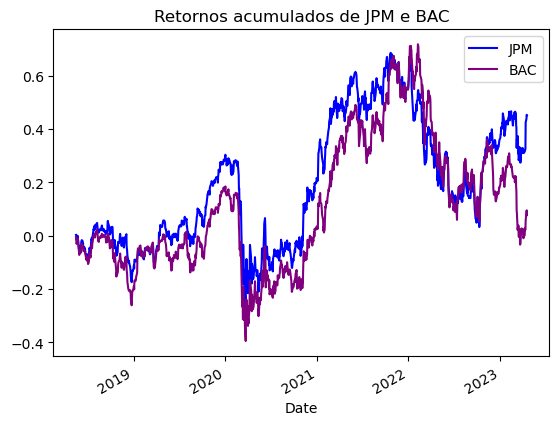

In [68]:
retornos_acum_bancos.dropna().plot(title = 'Retornos acumulados de JPM e BAC', color = ['Blue', 'Purple'])

#### Ponderando alocação pelo Beta